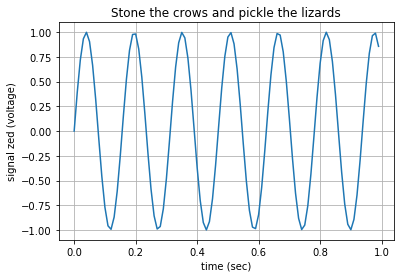

In [15]:
# the purpose of this experment was to see if this would be a good tool
# to enable processing of a large amount of data.  In this tool we have
# access to alot of math centric and data manipulation functions that
# might enable filter development, and fourier series with numpy.
# We have data array manipulation, sql database facilities all rolled in.
# this small project just experiments with graph updates and GUI 
# interactive elements.

from ipywidgets import widgets, interact
from IPython.html.widgets import *
from IPython.display import display
from IPython import embed
import time
from matplotlib.pyplot import *
from pylab import * #need arange to get the input data

#widget declarations
InputText = widgets.Text(description="Input:")
outputText = widgets.Text(description="output:")
display(InputText)
display(outputText)
button = widgets.Button(description="filter button")
display(button)


#data array
t = arange(0.0, 1.0, 0.01)

#widget handlers
def handle_submit(sender):
    print(InputText.value)
    outputText.value = "OK"
    
def on_button_clicked(b):
    print("Button clicked.")
    
def f(x):
    print(x)
    
def pltsin(f):
    plt.plot(t,sin(2*pi*t*f))
    #lables for graph
    plt.xlabel("time (sec)")
    plt.ylabel("signal zed (voltage)")
    plt.title("Stone the crows and pickle the lizards")
    plt.grid(True)
    plt.show()
    
#tie in form button click to print out
button.on_click(on_button_clicked)
#tie in from input text to output box
InputText.on_submit(handle_submit)
#tie in from x widget to print out text
interact(f,x=10)
#tie in from f widget to graph frequency
interact(pltsin, f=(1,10,0.1))
    



In [2]:
#this uses magic.. connects to sql and R and a bunch of stuff.. you can may your own backdoor here.
%time print ("do you have the time?")

do you have the time?
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 297 µs


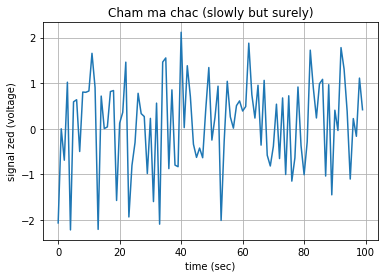

In [16]:
#update graph every second
import pylab as pl
from IPython import display

#tie in from sleep job
for x in range(10):
    pl.clf()
    #lables for graph
    pl.xlabel("time (sec)")
    pl.ylabel("signal zed (voltage)")
    pl.title("Cham ma chac (slowly but surely)")
    pl.grid(True)
    pl.plot(pl.randn(100))
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1)

In [ ]:
#**********this did not work.  Do not run this cell.   
#******I have to figure out how to run this in parallel
#******leveraged example from here: https://stackabuse.com/basic-socket-programming-in-python/
#*** this code does run well as standalone.
#**** I also found this. http://tech.marksblogg.com/python-big-data-airflow-jupyter-notebook-hadoop-3-hive-presto.html
#*** this could be cool if we have multiple data pipes.. like at a game 
#****with multiple players and multiple heads up displays.
#goal here is to setup a socket server
import socket
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
#local host
local_hostname = socket.getfqdn()
local_fqdn = socket.getfqdn()
ip_address = socket.gethostbyname(local_hostname)
print("working on %s (%s) with %s" %(local_hostname, local_fqdn, ip_address))

#bind teh scoket to the port
server_address = (ip_address, 23456)
print('starting up on %s port %s' % server_address)
sock.bind(server_address)

#listen for incoming connections (server mode) with one connection at a time
sock.listen(1)

while True:
    # wait for a connection
    print ('waiting for a connection')
    connection, client_address = sock.accept()

    try:
        # show who connected to us
        print ('connection from', client_address)

        # receive the data in small chunks and print it
        while True:
            data = connection.recv(64)
            if data:
                # output received data
                print ("Data: %s" % data)
            else:
                # no more data -- quit the loop
                print ("no more data.")
                break
    finally:
        # Clean up the connection
        print ('closing server connection')
        connection.close()


working on moonlight (moonlight) with 127.0.1.1
starting up on 127.0.1.1 port 23456
waiting for a connection


In [ ]:
#this did not work. *****************Do not run this cell.  
#I have to figure out how to run this in parallel with the server above.
#******leveraged example from here: https://stackabuse.com/basic-socket-programming-in-python/
#*** this code does run well as standalone.


# load additional Python modules
import socket  
import time

# create TCP/IP socket
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# retrieve local hostname
local_hostname = socket.gethostname()

# get fully qualified hostname
local_fqdn = socket.getfqdn()

# get the according IP address
ip_address = socket.gethostbyname(local_hostname)

# bind the socket to the port 23456, and connect
server_address = (ip_address, 23456)  
sock.connect(server_address)  
print ("connecting to %s (%s) with %s" % (local_hostname, local_fqdn, ip_address))

# define example data to be sent to the server
temperature_data = ["15", "22", "21", "26", "25", "19"]  
for entry in temperature_data:  
    print ("data: %s" % entry)
    new_data = str("temperature: %s\n" % entry).encode("utf-8")
    sock.sendall(new_data)

    # wait for two seconds
    time.sleep(2)

# close connection
sock.close() 
